# Exercice 2

1. Utiliser la fonction  loadtxt du package  numpy en Python (ici d√©sign√© par  np ).
Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :

In [21]:
import numpy as np 

x = np.loadtxt('ex2dat/ex2x.dat')
y = np.loadtxt('ex2dat/ex2y.dat')

# On affiche les 5 premi√®res valeurs pour v√©rifi√© 
print("x : \n",x[:5]) 
print("y : \n",y[:5]) 

x : 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
y : 
 [399900. 329900. 369000. 232000. 539900.]


2. Normalisation des donn√©es : 

In [22]:
import sklearn as sk

scaler = sk.preprocessing.StandardScaler()

dataX_norm = scaler.fit_transform(x)

print("Donn√©es normaliser :",dataX_norm[:5])

Donn√©es normaliser : [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


3. 
D√©finir les fonctions en Python sous forme matricielle pour repr√©senter la fonction d'hypoth√®se, le vecteur tel d√©fini dans le cours :[...] , la fonction d√©crivanrt une it√©ration et la fonction de co√ªt J($\theta$) 

In [23]:

# On construit la matrice X augment√©e et le vecteur Y 
X = np.c_[np.ones(dataX_norm.shape[0]), dataX_norm]
Y = y 

print("\n Matrice X : \n",X[:5])
print("\n Vecteur Y : \n",Y[:5])

# Fonction hypoth√®se
def h(theta,X):
     return X @ theta


theta_test1 = np.array([1.0, 2.0, -0.5])  # [Œ∏0, Œ∏1, Œ∏2]
test = h(theta_test1,X)
print("\nTest fonction d'hyoth√®se : \n",test)      


 Matrice X : 
 [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]

 Vecteur Y : 
 [399900. 329900. 369000. 232000. 539900.]

Test fonction d'hyoth√®se : 
 [ 1.37587753  0.09376529  2.12886408  0.28984183  2.99103891  0.40900732
 -0.07413036 -0.34632483 -0.46588688 -0.1758853   0.29453301  1.11131468
  0.8314886   6.08673466 -0.75080071  1.21032746  0.04562998 -0.83220466
  1.99638437  3.06989899  0.51859216  1.49055012  0.10394078  0.35049822
  5.91923558 -1.17817146 -0.26746475  2.44939214  1.62008938  2.7317621
  1.36590032 -0.10426027  0.54892036  4.00369884 -0.03362667 -0.32088609
 -0.82457304  0.78295672  6.0818452   0.85927292  0.92072246  1.71675658
  1.88954169 -0.92378411 -1.14490282  0.07067214 -0.91615249]


Calcule du vecteur d√©finit dans le cours ($E = h_{\theta}(X) - Y$
) : 

In [24]:
def E(theta,X,Y): 
    return h(theta,X) - Y

# Test
theta = np.array([1.0, 2.0, -0.5])
err = E(theta, X, Y)
print(err[:5])


[-399898.62412247 -329899.90623471 -368997.87113592 -231999.71015817
 -539897.00896109]


D√©finition de la  fonction co√ªt $J(\theta)$: 

In [25]:

def J(theta,X,Y):
    # Variable du resultat de la fonction cout  
    res = None
    m = X.shape[0]
    # Somme crit√®re des moindre carr√© 
    somme_crit = np.sum(E(theta,X,Y)**2)
    
    res = (1.0/(2*m))*(somme_crit)
    return res

result_test = J(theta_test1,X,Y)
print("Test fonction co√ªt :\n",result_test)

Test fonction co√ªt :
 65591023522.006805


fonction d√©crivant une it√©ration pour calculer une nouvelle valeur de theta : 

In [26]:
def iteration(theta, X, Y, alpha=0.07):
    theta = np.asarray(theta, dtype=float)
    m = X.shape[0]
    e = E(theta, X, Y)                      
    assert e.shape[0] == m
    grad = (1.0 / m) * (X.T @ e)            
    theta_next = theta - alpha * grad
    return theta_next
    

4. Pour la valeur du taux d'apprentissage $\alpha = 0{,}07$, effectuez le calcul de r√©gression permettant d'obtenir le vecteur $\theta = (\theta_0, \theta_1, \theta_2)$ optimal, afin de calculer la meilleure r√©gression lin√©aire multivari√©e sur le jeu de donn√©es d'apprentissage :

In [27]:
def gradient(X,Y, alpha = 0.07, nb_iterations_max = 2500, e = 1e-6): 
    # Initialisation 
    theta = np.zeros(X.shape[1])
        
    for i in range(nb_iterations_max): 
        theta_old = theta.copy()    # on copie la valeur de theta 
        
        theta = iteration(theta,X,Y,alpha) # calcule de la nouvelle valeur optimal du vecteur theta
        
        # Afficher le progr√®s
        if i % 100 == 0:  
            print(f"It√©ration {i:4d}: Theta = {theta}")
            
        # Crit√®re d'arrets (diff√©rence relative)
        if i > 0: # condition pour eviter les division par z√©ro √† la premi√®re it√©ration 
           
           # Calcule |Œ∏^(n+1) - Œ∏^(n)| 
           diff_theta = np.linalg.norm(theta-theta_old)
           
           #Calcule de theta |Œ∏^(n)|
           norm_theta_old = np.linalg.norm(theta_old)
            
            # √âviter la division par z√©ro  
           if norm_theta_old > 1e-10: 
            # Calcule du crit√®re d'arr√™t 
              diff_rel = diff_theta / norm_theta_old
              
              # V√©rifier le crit√®re d'arr√™t
              if diff_rel < e :
                  print(f"Crit√®re d'arr√™t d√©clencher ! Fin de la boucle") 
                  break
            
    else : 
        print("Nombre d'it√©ration maximum atteint ! ")
                   
    print(f"Theta optimal :{theta}")
    
    return theta      
            
# Utilisation 
theta_optimal = gradient(X,Y,alpha = 0.07, e=1e-6)            

It√©ration    0: Theta = [23828.88617021  7403.4893445   3829.61752291]
It√©ration  100: Theta = [340189.41366678 106985.99621642  -4117.42596665]
It√©ration  200: Theta = [340412.50214778 109340.04737273  -6470.60576553]
Crit√®re d'arr√™t d√©clencher ! Fin de la boucle
Theta optimal :[340412.65921994 109440.01514972  -6570.57353424]


5. . Nous allons maintenant automatiser la recherche du meilleur taux d'apprentissage
. Pour ce faire, on devra calculer pour chaque it√©ration la valeur de
la fonction de co√ªt  et on stockera toutes ces valeurs dans un vecteur. Comme
on veut s√©lectionner un taux d'apprentissage efficace, on va comparer les r√©sultats
de calcul de  sur 50 it√©rations en changenat de taux d'apprentissage √† chaque
ùõº‚àà[0, 001; 10]. pour ce faire on stockera toutes ces valeurs dans un vecteur. Comme on veut s√©lectionner un taux d'apprentissage efficace, on va comparer les r√©sultat de calcul de J(theta) sur 50 it√©rations en changant le taux d'apprentissage √† chaque s√©rie d'it√©rations. 
Les valeurs de ce taux doivent rester entre [0.001;10]. 

In [28]:
def gradient_with_comparison(X, Y, nb_tests=20, iterations_par_test=50, e=1e-6): 
    """
    Compare diff√©rents taux d'apprentissage sur 50 it√©rations chacun
    """
    best_alpha = None
    best_cost = float('inf')
    alpha_costs = []
    all_costs_evolution = []  # Pour tracer les courbes
    
    print("=== Comparaison de diff√©rents taux d'apprentissage ===")
    
    for test in range(nb_tests):
        # G√©n√©rer un alpha al√©atoire dans [0.001, 10]
        alpha = np.random.uniform(0.001, 10)
        
        # Initialiser theta pour ce test
        theta = np.zeros(X.shape[1])
        cout_evolution = []
        
        # Faire exactement 50 it√©rations avec cet alpha
        for i in range(iterations_par_test):
            theta = iteration(theta, X, Y, alpha)
            cout = J(theta, X, Y)
            cout_evolution.append(cout)
        
        # Stocker les r√©sultats
        cout_final = cout_evolution[-1]
        alpha_costs.append((alpha, cout_final))
        all_costs_evolution.append((alpha, cout_evolution))
        
        # Comparer avec le meilleur
        if cout_final < best_cost:
            best_cost = cout_final
            best_alpha = alpha
            print(f"Test {test+1:2d}: Nouveau meilleur Œ± = {alpha:.4f}, J(Œ∏) = {cout_final:.4f} ‚≠ê")
        else:
            print(f"Test {test+1:2d}: Œ± = {alpha:.4f}, J(Œ∏) = {cout_final:.4f}")
    
    print(f"\n=== R√©sultats de la comparaison ===")
    print(f"Meilleur taux d'apprentissage: Œ± = {best_alpha:.4f}")
    print(f"Meilleur co√ªt apr√®s 50 it√©rations: J(Œ∏) = {best_cost:.4f}")
    
    return best_alpha, alpha_costs, all_costs_evolution

def convergence_complete_avec_meilleur_alpha(X, Y, best_alpha, e=1e-6, max_iter=2500):
    """
    Calcule Œ∏ optimal jusqu'√† convergence avec le meilleur alpha trouv√©
    """
    print(f"\n=== Convergence compl√®te avec Œ± = {best_alpha:.4f} ===")
    
    theta = np.zeros(X.shape[1])
    cout_vector = []
    
    for i in range(max_iter):
        theta_old = theta.copy()
        theta = iteration(theta, X, Y, best_alpha)
        cout = J(theta, X, Y)
        cout_vector.append(cout)
        
        # Afficher le progr√®s
        if i % 100 == 0:
            print(f"It√©ration {i:4d}: J(Œ∏) = {cout:.6f}")
        
        # Crit√®re d'arr√™t
        if i > 0:
            diff_theta = np.linalg.norm(theta - theta_old)
            norm_theta_old = np.linalg.norm(theta_old)
            
            if norm_theta_old > 1e-10:
                diff_rel = diff_theta / norm_theta_old
                
                if diff_rel < e:
                    print(f"Convergence atteinte √† l'it√©ration {i}")
                    break
    else:
        print("Nombre d'it√©ration maximum atteint")
    
    print(f"Theta optimal final: {theta}")
    return theta, cout_vector

best_alpha, alpha_costs, all_costs_evolution = gradient_with_comparison(X, Y, nb_tests=20, iterations_par_test=50)

# Afficher le top 5 des meilleurs taux d'apprentissage
print("\n=== Top 5 des meilleurs taux d'apprentissage ===")
alpha_costs_triees = sorted(alpha_costs, key=lambda x: x[1])[:5]
for i, (alpha_val, cost_val) in enumerate(alpha_costs_triees):
    print(f"{i+1}. Œ± = {alpha_val:.4f}, J(Œ∏) = {cost_val:.4f}")

# Convergence compl√®te avec le meilleur alpha trouv√©
theta_optimal, cout_vector = convergence_complete_avec_meilleur_alpha(X, Y, best_alpha)


=== Comparaison de diff√©rents taux d'apprentissage ===
Test  1: Nouveau meilleur Œ± = 1.3123, J(Œ∏) = 415547983750.1554 ‚≠ê
Test  2: Œ± = 6.8342, J(Œ∏) = 1313505482240312534016948492482021461930599429852776015778217445369617900161855263787211500398819842067529728.0000
Test  3: Œ± = 3.3639, J(Œ∏) = 2686743295968310335395908090294032274541358773263683845486759531784437760.0000
Test  4: Œ± = 5.1199, J(Œ∏) = 11073468514026833328111805629103210449742454556838127202074986956493611491656973417177713475584.0000
Test  5: Œ± = 2.7591, J(Œ∏) = 33192261509597175180460480962102863013178252586412731239759872.0000
Test  6: Œ± = 7.2817, J(Œ∏) = 1407554469785932878826556893183237261526724972578090974858141818941871907036247226558168744212112055922375786496.0000
Test  7: Nouveau meilleur Œ± = 0.2351, J(Œ∏) = 2043306805.5793 ‚≠ê
Test  8: Œ± = 7.1085, J(Œ∏) = 100175184767923868895682952384148373062454997600630711803337873590310214030023145722335972689587695566232485888.0000
Test  9: Œ± = 5.1656, J(Œ∏) = 

Visualisation : 


=== Visualisation des courbes de comparaison ===


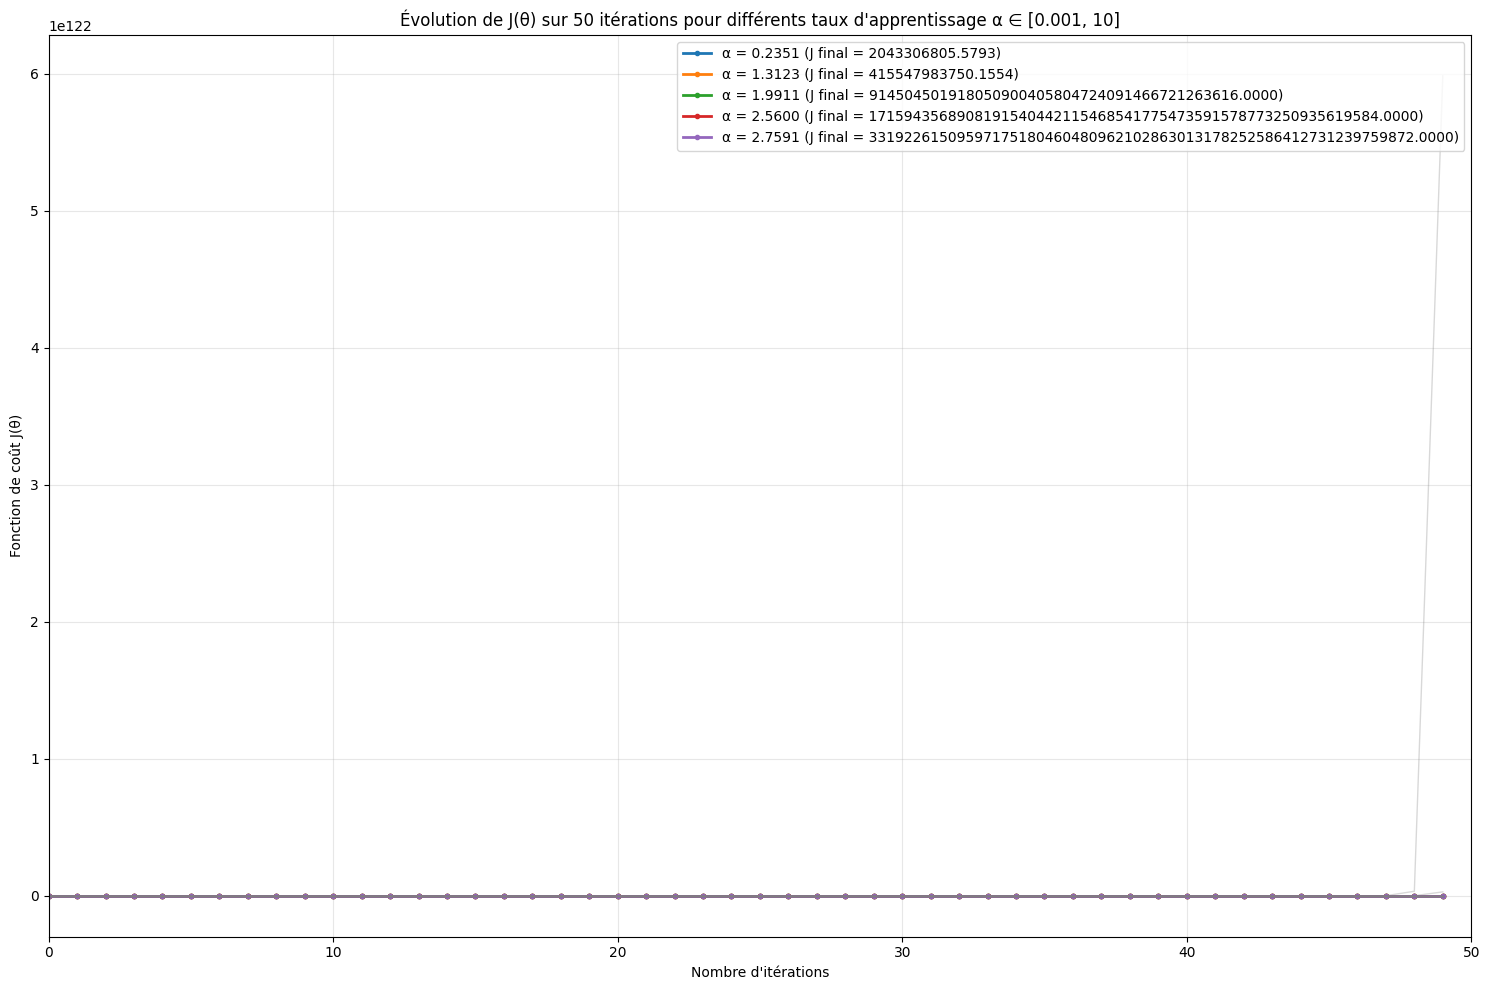


=== Visualisation de la convergence finale ===


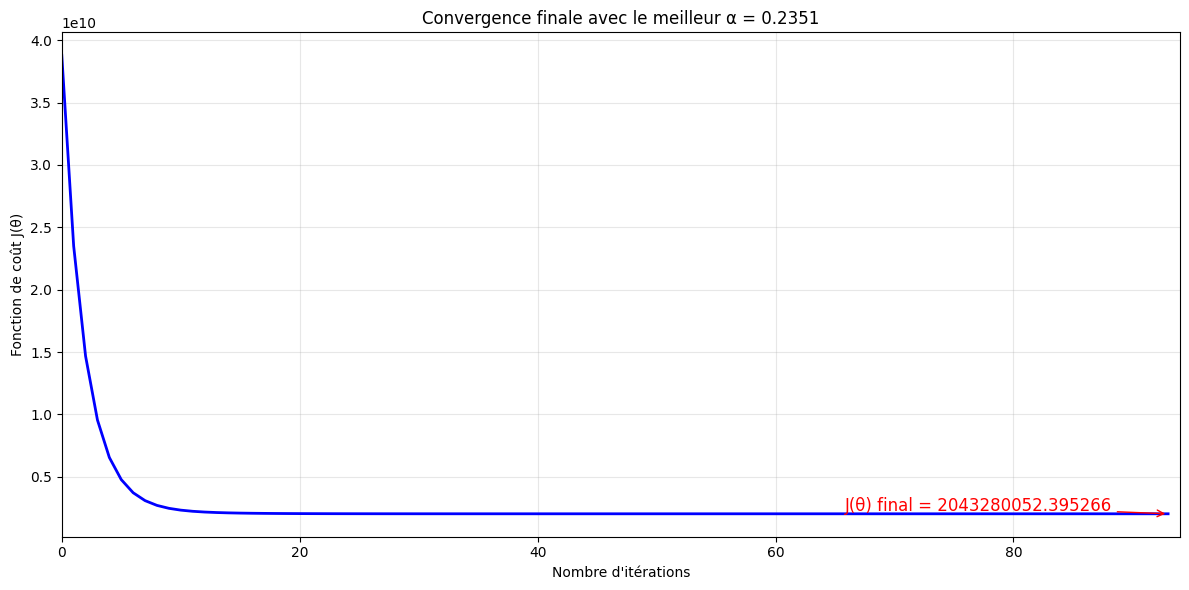


=== Pr√©diction pour un logement de 1650 m¬≤ et 3 pi√®ces ===
Prix pr√©dit: 293081.91

=== R√©sum√© final ===
- Meilleur Œ± trouv√©: 0.2351
- Theta optimal: [340412.65957058 109445.77819831  -6576.33658283]
- Nombre d'it√©rations pour la convergence: 94
- Co√ªt final: J(Œ∏) = 2043280052.395266


In [30]:
import matplotlib.pyplot as plt

# Visualisation des courbes de comparaison des alphas
print("\n=== Visualisation des courbes de comparaison ===")

plt.figure(figsize=(15, 10))

# Trier par co√ªt final pour mettre en √©vidence les meilleurs
sorted_results = sorted(all_costs_evolution, key=lambda x: x[1][-1])

# Tracer toutes les courbes
for i, (alpha, cout_evolution) in enumerate(sorted_results):
    if i < 5:  # Les 5 meilleurs en couleurs distinctes et traits pleins
        plt.plot(range(len(cout_evolution)), cout_evolution, 
                linewidth=2, marker='o', markersize=3,
                label=f"Œ± = {alpha:.4f} (J final = {cout_evolution[-1]:.4f})")
    else:  # Les autres en gris transparent
        plt.plot(range(len(cout_evolution)), cout_evolution, 
                color='gray', alpha=0.3, linewidth=1)

plt.xlabel('Nombre d\'it√©rations')
plt.ylabel('Fonction de co√ªt J(Œ∏)')
plt.title('√âvolution de J(Œ∏) sur 50 it√©rations pour diff√©rents taux d\'apprentissage Œ± ‚àà [0.001, 10]')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)
plt.tight_layout()
plt.show()

# Visualisation de la convergence finale
print("\n=== Visualisation de la convergence finale ===")

plt.figure(figsize=(12, 6))

plt.plot(range(len(cout_vector)), cout_vector, 'b-', linewidth=2)
plt.xlabel('Nombre d\'it√©rations')
plt.ylabel('Fonction de co√ªt J(Œ∏)')
plt.title(f'Convergence finale avec le meilleur Œ± = {best_alpha:.4f}')
plt.grid(True, alpha=0.3)
plt.xlim(0, len(cout_vector))

# Ajouter une annotation pour le co√ªt final
plt.annotate(f'J(Œ∏) final = {cout_vector[-1]:.6f}', 
            xy=(len(cout_vector)-1, cout_vector[-1]), 
            xytext=(len(cout_vector)*0.7, cout_vector[-1]*1.1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Pr√©diction pour un logement de 1650 m¬≤ et 3 pi√®ces
print("\n=== Pr√©diction pour un logement de 1650 m¬≤ et 3 pi√®ces ===")
nouveau_logement = np.array([[1650, 3]])  # Surface et nombre de pi√®ces
nouveau_logement_norm = scaler.transform(nouveau_logement)  # Normalisation

# Construire correctement X_prediction avec le biais
X_prediction = np.c_[np.ones(nouveau_logement_norm.shape[0]), nouveau_logement_norm]

prix_predit = h(theta_optimal, X_prediction)
print(f"Prix pr√©dit: {prix_predit[0]:.2f}")

print(f"\n=== R√©sum√© final ===")
print(f"- Meilleur Œ± trouv√©: {best_alpha:.4f}")
print(f"- Theta optimal: {theta_optimal}")
print(f"- Nombre d'it√©rations pour la convergence: {len(cout_vector)}")
print(f"- Co√ªt final: J(Œ∏) = {cout_vector[-1]:.6f}")